In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
out_dir = Path("../phys-vae/data/climate/")

In [5]:
data = pd.read_excel("complete_data.xlsx")

In [9]:
data.head(50)

,DateTime,NEE,NEE_unc,LE,LE_unc,H,H_unc,Tau,Tau_unc,CO2_strg,...,Sun App Long (deg),Mean Obliq Ecliptic (deg),Obliq Corr (deg),Sun Declin (deg),var y,Eq of Time (minutes),HA Sunrise (deg),Solar Noon (LST),Sunrise Time (LST),Sunset Time (LST)
0,2012-06-22 00:30:00,12.5670,3.06210,-9999.000,14.63100,-2.9117,0.72031,0.17393,0.012095,-0.103920,...,91.009689,23.437669,23.43538,23.431524,0.04302,-1.989238,90.907872,12:01:59.354000,05:58:21.465000,18:05:37.244000
1,2012-06-22 01:00:00,6.7892,2.06360,37.362,12.32800,-10.5920,0.64084,0.17662,0.012124,0.089560,...,91.029567,23.437669,23.43538,23.431371,0.04302,-1.993748,90.907871,12:01:59.625000,05:58:21.736000,18:05:37.514000
2,2012-06-22 01:30:00,4.0302,0.54104,35.169,4.71360,-15.9840,1.20660,0.18260,0.013019,-0.204920,...,91.049444,23.437669,23.43538,23.431214,0.04302,-1.998258,90.907870,12:01:59.895000,05:58:22.007000,18:05:37.784000
3,2012-06-22 02:00:00,5.0909,0.33387,32.364,3.55670,-13.9460,0.63822,0.12357,0.008703,-0.035944,...,91.069321,23.437669,23.43538,23.431055,0.04302,-2.002767,90.907869,12:02:00.166000,05:58:22.277000,18:05:38.055000
4,2012-06-22 02:30:00,5.8500,0.44881,28.569,3.85870,-14.0660,0.77249,0.15957,0.011172,0.074542,...,91.089199,23.437669,23.43538,23.430893,0.04302,-2.007276,90.907868,12:02:00.437000,05:58:22.548000,18:05:38.325000
5,2012-06-22 03:00:00,4.1455,0.98754,24.648,12.60200,-14.1820,0.76101,0.13249,0.009131,0.025845,...,91.109076,23.437669,23.43538,23.430727,0.04302,-2.011784,90.907867,12:02:00.707000,05:58:22.819000,18:05:38.595000
6,2012-06-22 03:30:00,3.4408,0.80687,11.048,8.15440,-14.9320,0.80979,0.13693,0.009080,0.201620,...,91.128953,23.437669,23.43538,23.430559,0.04302,-2.016292,90.907866,12:02:00.978000,05:58:23.090000,18:05:38.865000
7,2012-06-22 04:00:00,3.4772,0.80788,36.742,8.46770,-15.0720,1.20000,0.13514,0.008611,-0.022391,...,91.148830,23.437669,23.43538,23.430388,0.04302,-2.020800,90.907865,12:02:01.248000,05:58:23.361000,18:05:39.135000
8,2012-06-22 04:30:00,5.4707,0.66564,13.321,5.32110,-12.6100,0.75674,0.14830,0.009997,0.147020,...,91.168707,23.437669,23.43538,23.430214,0.04302,-2.025307,90.907863,12:02:01.518000,05:58:23.631000,18:05:39.406000
9,2012-06-22 05:00:00,4.8830,0.53958,14.134,3.10020,-11.6310,1.00730,0.11883,0.007229,-0.068287,...,91.188584,23.437669,23.43538,23.430036,0.04302,-2.029814,90.907862,12:02:01.789000,05:58:23.902000,18:05:39.676000


In [5]:
data = data[data['Day/Night'] == False].reset_index(drop=True)

In [6]:
data = data.drop(np.argwhere(data.values == -9999)[:,0]).reset_index(drop=True)

In [9]:
np.mean(data["NEE"] - data["NEE_filled"])

1.2136191179027645e-05

In [7]:
columns_to_pick = ['NEE', 'LE', 'LE_unc', 'H', 'H_unc', 'Tau',
       'Tau_unc', 'CO2_strg', 'LE_strg', 'H_strg', 'Pa', 'Ta', 'RH', 'VPD',
       'Rnet', 'Rg', 'G1', 'G2', 'G3', 'G4', 'Tsoil1', 'Tsoil2', 'VWC_1',
       'VWC2', 'Precipitation', 'Windspeed', 'Winddir', 'FootprintFraction',
       'Ustar', 'TKE', 'Tstar', 'L', 'zL','TER', 'GEP']

In [8]:
data = data[columns_to_pick]

In [9]:
data.to_csv(out_dir.joinpath("train_night_sample.csv"), index=False)

In [8]:
data = pd.read_csv(out_dir.joinpath("train_night_sample.csv"))

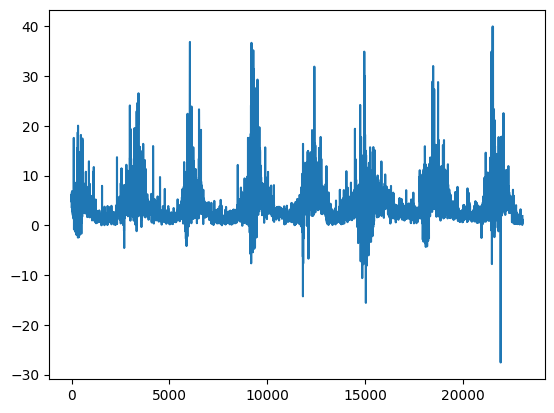

In [10]:
plt.plot(data["NEE"])

In [14]:
NEE = data["NEE"]
Tair = data["Ta"]
del data["NEE"]
del data["Ta"]

In [15]:
normalizer = MinMaxScaler()
normalizer.fit(data)
norm_data = normalizer.transform(data)

In [16]:
data[data.columns] = norm_data

In [17]:
data["NEE"] = NEE
data["Ta"] = Tair

In [18]:
train, val = train_test_split(data, test_size=0.3)

train.to_csv(out_dir.joinpath("train_night_subset_train.csv"), index=False)
val.to_csv(out_dir.joinpath("train_night_subset_val.csv"), index=False)

In [19]:
data

,LE,LE_unc,H,H_unc,Tau,Tau_unc,CO2_strg,LE_strg,H_strg,Pa,...,FootprintFraction,Ustar,TKE,Tstar,L,zL,TER,GEP,NEE,Ta
0,0.370191,0.065086,0.604568,0.000173,0.023892,0.052838,0.483723,0.587748,0.492924,0.000042,...,0.961039,0.134021,0.023217,0.519540,0.473216,0.425060,0.289418,0.439563,5.32550,17.94
1,0.352758,0.025238,0.600946,0.030593,0.022525,0.065877,0.509593,0.580296,0.501912,0.000042,...,0.961039,0.134021,0.022345,0.511900,0.472480,0.425940,0.288344,0.442150,5.14360,18.04
2,0.352303,0.100696,0.571380,0.045506,0.033370,0.074097,0.525457,0.521052,0.508687,0.000042,...,0.961039,0.164948,0.033725,0.465260,0.472004,0.428776,0.287273,0.439420,5.29860,18.18
3,0.331929,0.006519,0.570549,0.060195,0.044112,0.103629,0.502284,0.583024,0.454006,0.000042,...,0.961039,0.195876,0.045086,0.472271,0.472148,0.427280,0.277477,0.445195,4.73990,17.45
4,0.321684,0.016704,0.560131,0.115275,0.029983,0.092393,0.514302,0.533935,0.447050,0.000042,...,0.961039,0.154639,0.035841,0.442036,0.471899,0.431232,0.273720,0.440654,4.96710,17.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23031,0.323230,0.003695,0.494340,0.128244,0.032958,0.060358,0.506220,0.547848,0.447475,0.985787,...,0.961039,0.154639,0.031473,0.340064,0.471790,0.440796,0.006238,0.427135,0.94792,3.26
23032,0.319281,0.003642,0.482959,0.132504,0.042860,0.075287,0.503145,0.575018,0.463671,0.985581,...,0.961039,0.185567,0.034345,0.346730,0.471820,0.436531,0.005927,0.422795,1.22880,3.13
23033,0.321400,0.005420,0.515975,0.150708,0.038933,0.102848,0.499960,0.577026,0.483154,0.985514,...,0.961039,0.175258,0.054384,0.387783,0.471841,0.434667,0.005786,0.433085,0.55406,3.11
23034,0.318360,0.004787,0.489053,0.163230,0.024849,0.056453,0.502257,0.542636,0.405653,0.984364,...,0.961039,0.134021,0.023521,0.300964,0.471757,0.450245,0.008941,0.417407,1.64150,5.42


(array([1.0000e+00, 2.0000e+00, 6.0000e+00, 1.3400e+02, 1.8348e+04,
        4.2140e+03, 2.6700e+02, 3.9000e+01, 1.7000e+01, 8.0000e+00]),
 array([-27.575 , -20.8194, -14.0638,  -7.3082,  -0.5526,   6.203 ,
         12.9586,  19.7142,  26.4698,  33.2254,  39.981 ]),
 <BarContainer object of 10 artists>)

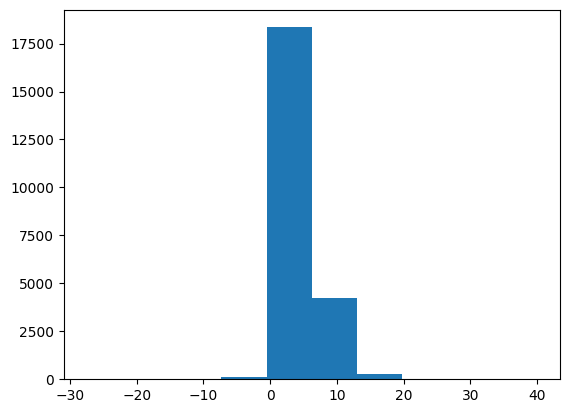

In [22]:
plt.hist(data["NEE"])